In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# 1. Simple Thresholding

In [2]:
# Thresholding 
tn1 = cv2.imread('tn1.png') # or JPG
img = cv2.cvtColor(tn1, cv2.COLOR_BGR2GRAY)

# 1. SIMPLE   - cv2.threshold         -- img, thresholdVal, maxVal, thresholdType 
# 2. Adaptive - cv2.adaptiveThreshold -- img, maxVal, adaptiveMethod(mean / gaussian), thresholdType, blocksize, constant
# 3. Otsu     - cv2.otsuThreshold     -- 

# applying different thresholding techniques on the input image
# all pixels value above 120 will be set to 255 in the case of THRESH_BINARY
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)

# refer to geeksforgeeks for explanations of each flag 
# https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-1-simple-thresholding/

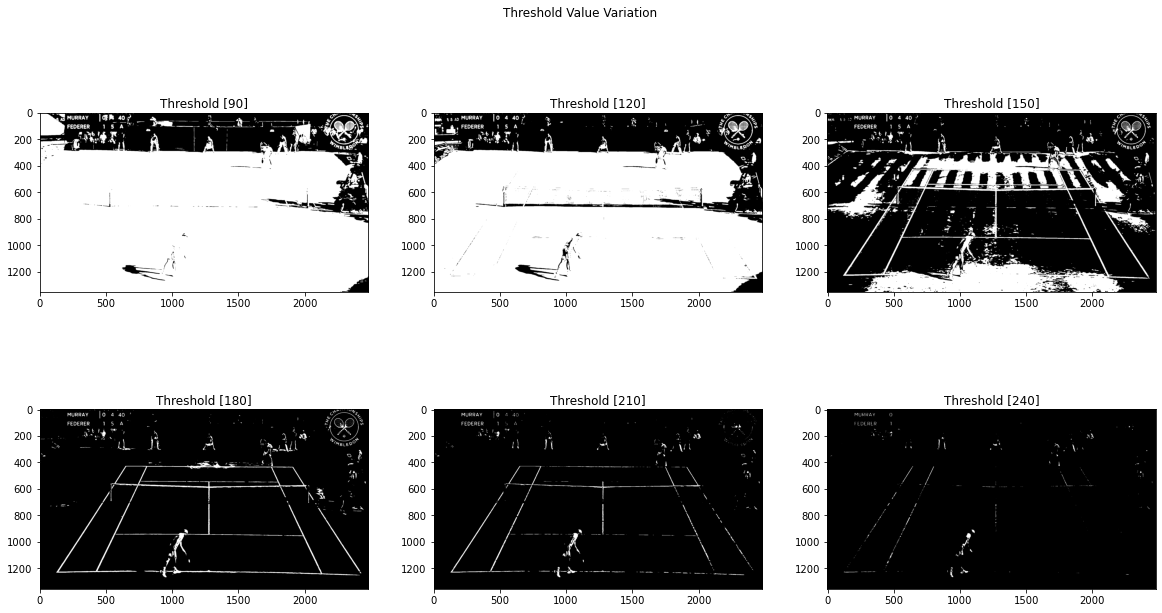

In [3]:
ths = np.array([[90, 120, 150], [180, 210, 240]])

fig, axs = plt.subplots(2, 3, figsize=(20,10))
fig.suptitle('Threshold Value Variation')

for a in range(2):
    for b in range(3):
        ret, threshold = cv2.threshold(img, ths[a][b], 255, cv2.THRESH_BINARY)
        filename = str(ths[a][b])+'.jpg'
        cv2.imwrite(filename, threshold)
        axs[a, b].imshow(threshold, cmap='gray')
        axs[a, b].set_title('Threshold [' + str(ths[a][b]) + ']')

## 1-1. Test 

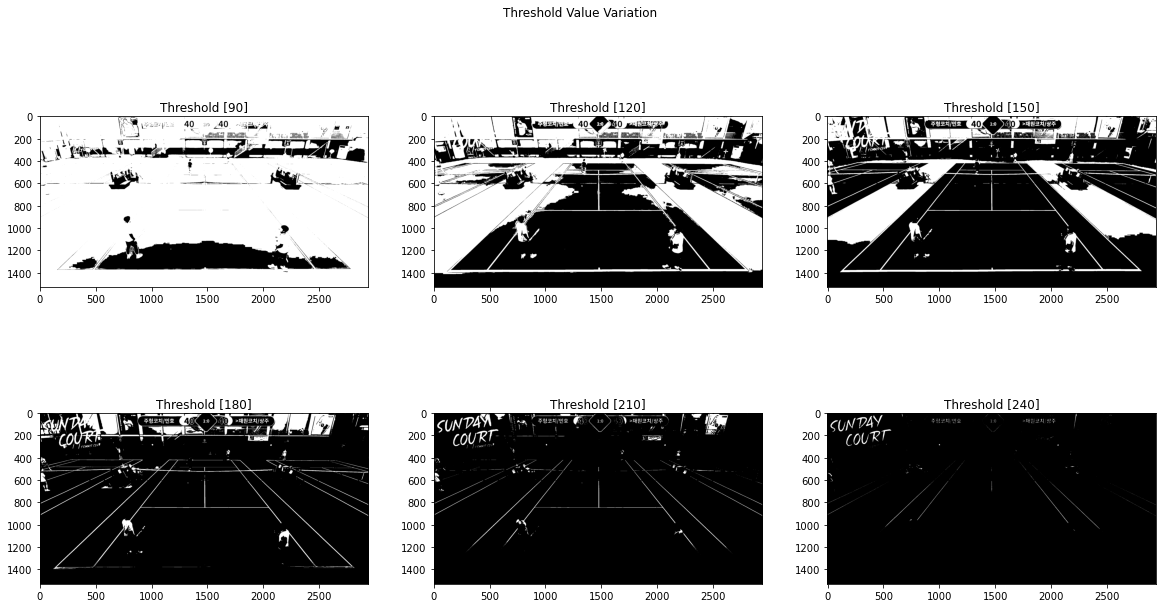

In [5]:
tn1 = cv2.imread('t1.png') # or JPG
img = cv2.cvtColor(tn1, cv2.COLOR_BGR2GRAY)

ths = np.array([[90, 120, 150], [180, 210, 240]])

fig, axs = plt.subplots(2, 3, figsize=(20,10))
fig.suptitle('Threshold Value Variation')

for a in range(2):
    for b in range(3):
        ret, threshold = cv2.threshold(img, ths[a][b], 255, cv2.THRESH_BINARY)
        filename = str(ths[a][b])+'.jpg'
        cv2.imwrite(filename, threshold)
        axs[a, b].imshow(threshold, cmap='gray')
        axs[a, b].set_title('Threshold [' + str(ths[a][b]) + ']')

# 2. Adaptive Thresholding

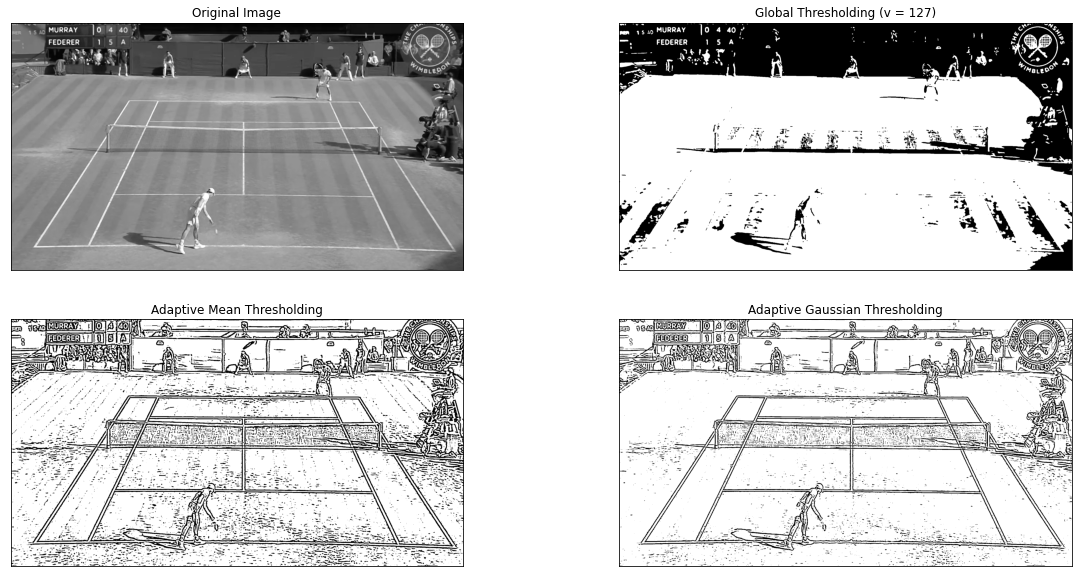

In [14]:
img = cv2.imread('tn1.png',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

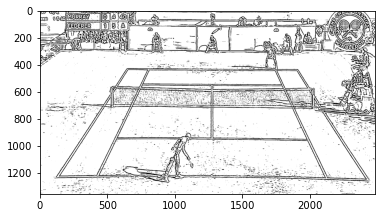

In [16]:
cv2.imwrite('Adap_Gaus.png', th3) 
plt.imshow(th3,'gray')

## 2-1 Test

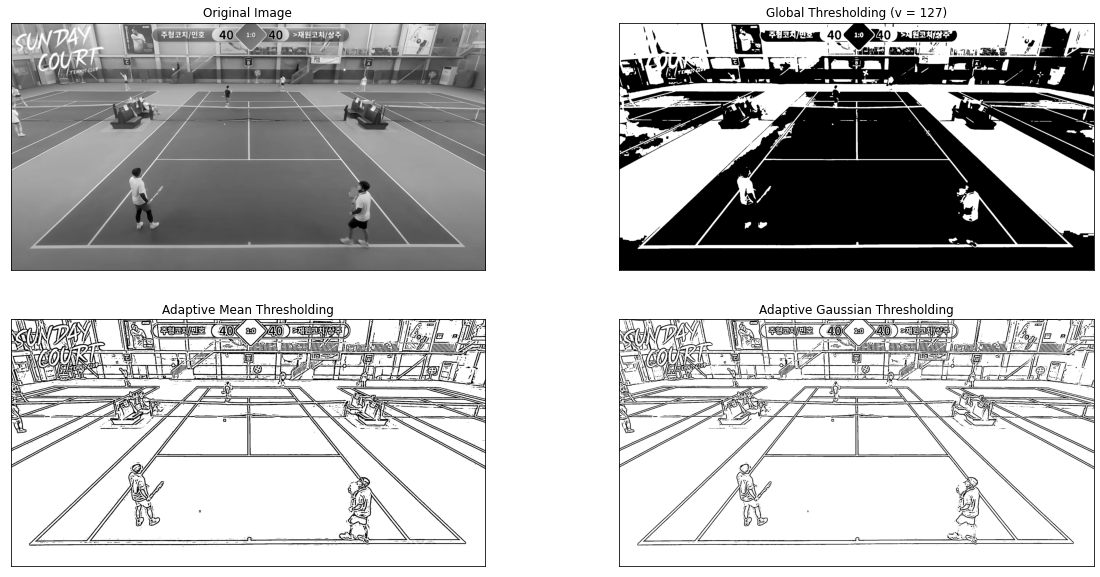

In [21]:
img = cv2.imread('t1.png',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 2-2 Contour Test 

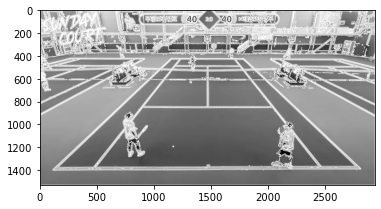

In [22]:
contours, hierarchy = cv2.findContours(th3, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    cv2.drawContours(img, [cnt], 0, (255, 0, 0), 2)  # blue

plt.imshow(img, cmap='gray')

# 3. Otsu Thresholding 

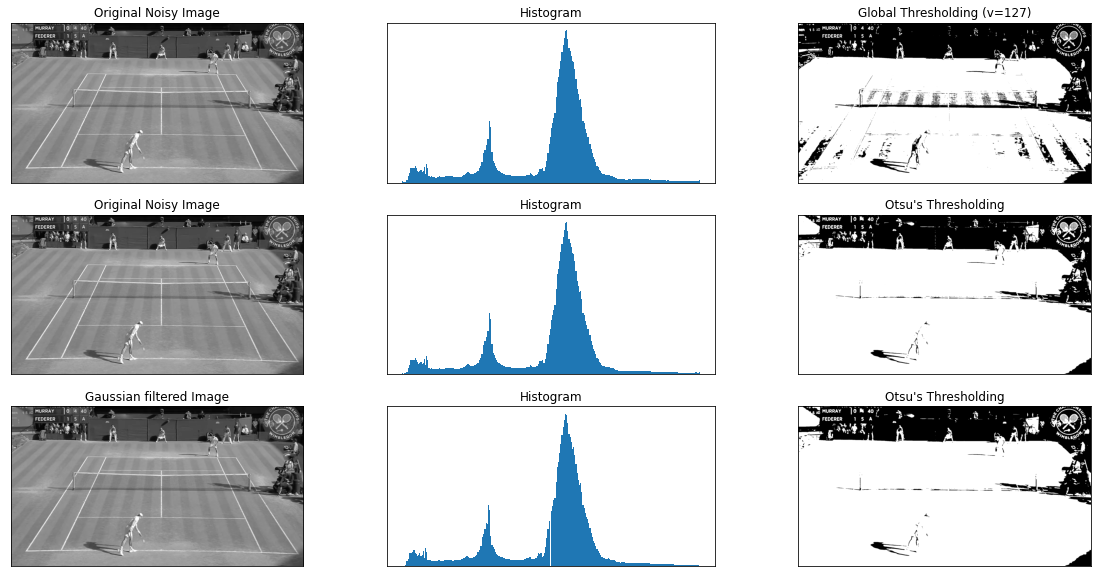

In [10]:
img = cv2.imread('tn1.png',0)

ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()